In [1]:
from IPython.display import Image

# 2.3 적응형 선형 뉴런과 학습의 수렴
* 아달린 : 연속함수(continuous function)로 비용 함수를 정의하고 최소화하는 핵심 개념
    * 가중치 업데이터 : 선형 활성화 함수 $\phi(z) = z$

$\phi(z)$ : 항등 함수

In [2]:
Image(url='https://git.io/JtIbn', width=600) 

퍼셉트론은 정답 클래스 레이블과 예측 클래스 레이블을 비교

아달린 알고리즘은 정답 클래스 레이블과 선형 활성화 함수의 실수 출력 값을 비교하여 모델의 오차를 계산하고 가중치를 업데이트.

### 2.3.1 경사 하강법으로 비용 함수 최소화
* 학습 과정 동안 최적화하기 위해 정의한 목적 함수
* 목적 함수 == 비용 함수 == 손실 함수
* 계산된 출력과 정답 클래스 레이블 사이의 제곱 오차합(Sum of Squared Errors, SSE)으로 가중치를 학습하기 위한 비용 함수 $J$를 정의

$J(\boldsymbol{w})=\dfrac{1}{2}\sum_i\left(y^{(i)}-\phi(z^{(i)})\right)^2$

* 경사 하강법을 적용하여 비용 함수를 최소화하는 가중치를 찾을 수 있음

In [3]:
Image(url='https://git.io/JtIbc', width=500)

진행 크기 = 경사의 기술기와 학습률로 결정.

* 제곱 오차합의 도함수

$\
\begin{align*}
\dfrac{\partial J}{\partial w_j}\
&=\dfrac{\partial}{\partial w_j}\dfrac{1}{2}\sum_i\left(y^{(i)}-\phi(z^{(i)})\right)^2 \\
&=\dfrac{1}{2}\dfrac{\partial}{\partial w_j}\sum_i\left(y^{(i)}-\phi(z^{(i)})\right)^2 \\
&=\dfrac{1}{2}\sum_i2\left(y^{(i)}-\phi(z^{(i)})\right)\dfrac{\partial}{\partial w_j}\left(y^{(i)}-\phi(z^{(i)})\right) \\
&=\sum_i\left(y^{(i)}-\phi(z^{(i)})\right)\dfrac{\partial}{\partial w_j}\left(y^{(i)}-\sum(w_kx_k^{(i)})\right) \\
&=\sum_i\left(y^{(i)}-\phi(z^{(i)})\right)\left(-x_j^{(i)}\right) \\
&=-\sum_i\left(y^{(i)}-\phi(z^{(i)})\right)x_j^{(i)} \\
\end{align*}
$

$\mathit\Delta w_j=-\eta\dfrac{\partial J}{\partial w_j}=\eta\sum_i\left(y^{(i)}-\phi(z^{(i)})\right)x_j^{(i)}$

$\boldsymbol{w} := \boldsymbol{w} + \mathit\Delta \boldsymbol{w}$

* 훈련 데이터셋에 있는 모든 샘플을 기반으로 가중치 업데이트 = 배치 경사 하강법(batch gradient descent)

### 2.3.2 아달린 구현

In [4]:
class AdalineGD(object):
    # 적응형 선형 뉴런 분류기
    # 매개변수 : eta, n_iter, random_state
    # 속성 : w_(학습된 가중치), cost_(epoch마다 누적된 비용함수의 제곱합)
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y): # 훈련 데이터 학습
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # 활성화 함수는 항등함수
            output = self.activation(net_input) # output = self.net_input(X)로 쓸 수 있음
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors) # 특성 행렬과 오차 벡터 간의 행렬-벡터 곱
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X): # 최종 입력 계산
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X): # 선형 활성화 계산
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

* activation 메서드는 단순한 항등 함수이기 때문에 아무런 영향을 미치지 않음.
* 입력 데이터의 특성에서 최종 입력, 활성화, 출력 순으로 진행


In [5]:
import pandas as pd
import numpy as np
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header=None, encoding='utf-8')

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values

Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

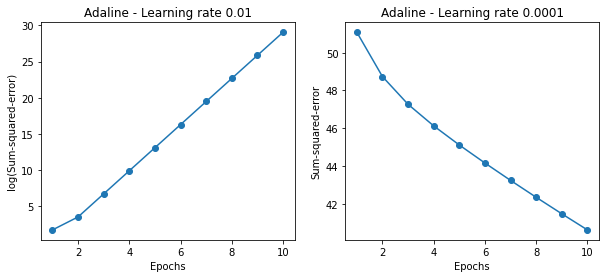

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o') # 손실값이 너무 커서 log 씌움
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

* 0.01의 경우 비용함수를 최소화 하지 못하고 에포크마다 점점 커짐
* 0.0001의 경우 비용이 감수하고 있지만, 학습률이 너무 작아서 최솟값에 수렴하려면 너무 많은 에폭이 필요.

In [7]:
Image(url='https://git.io/JtIb4', width=700) 

### 2.3.2 특성 스케일을 조정하여 경사 하강법 결과 향상
* 표준화(Standardization) 특성 스케일 : 각 특성의 평균을 0에 맞추고 특성의 표준 편차를 1(단위 분산)으로 만듬.
* 데이터에 평균이 0이고 단위 분산을 갖는 표준 정규 분포의 성질을 부여하여 경사 하강법 학습이 좀 더 빠르게 수렴되도록 도움.
* 원본 데이터셋을 정규 분포로 만드는 것이 아님.
* 표준화(standardization) : $\boldsymbol{x}'_j=\dfrac{\boldsymbol{x}_j-\mu_j}{\sigma_j}$
    * 평균 : $\mu_j$
    * 표준 편차 : $\sigma_j$


In [8]:
Image(url='https://git.io/JtIbB', width=700) 

In [9]:
# 표준화
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [10]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 설정합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # 꽃받침 길이 최소/최대
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # 꽃잎 길이 최소/최대
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor=None if idx==1 else 'black')

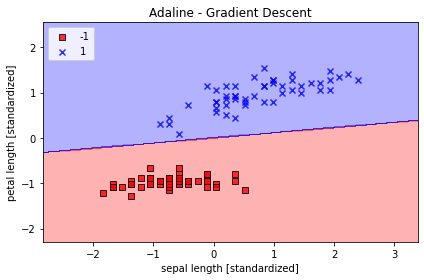

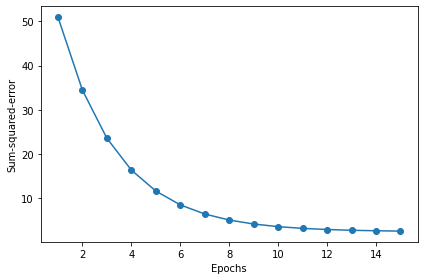

In [11]:
# 표준화 후 아달린 모델을 훈련하고 학습률 0.01에서 몇 번의 에폭만에 수렴하는지 확인
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

### 2.3.4 대규모 머신 러닝과 확률적 경사 하강법
* 배치 경사 하강법
    * 전제 훈련 데이터셋에서 계산한 그레이디언트의 반대 방향으로 한 걸음씩 진행하여 비용 함수를 최소화
    * $\mathit\Delta \boldsymbol{w}=\eta\sum_i\left(y^{(i)}-\phi(z^{(i)})\right)\boldsymbol{x}^{(i)}$
    * 매우 큰 데이터셋일 경우 계산 비용이 매우 많이 드는 단점이 있음.

* 확률적 경사 하강법
    * 배치 경사 하강법의 다른 대안.
    * 각 훈련 샘플에 대해 조금씩 가중치를 업데이트하는 방법
    * 확률적 경사 하강법에서 좋은 결과를 얻으려면 shuffle를 True 해야한다.
    * $\mathit\Delta \boldsymbol{w}=\eta\left(y^{(i)}-\phi(z^{(i)})\right)\boldsymbol{x}^{(i)}$

$확률적$ 경사 하강법의 또 다른 장점은 온라인 학습이 가능.

온라인 학습에서 모델은 새로운 훈련 데이터가 도착하는 대로 훈련됨.




In [12]:
class AdalineSGD(object):
    # ADAptive Linear NEuron 분류기
    # 파라미터
    # eta : 학습률
    # n_iter : 훈련 데이터 반복 횟수
    # shuffle : True로 설정 시 같은 반복이 되지 않도록 에폭마다 훈련 데이터를 섞음
    # random_state : 가중치 무작위 초기화를 위한 난수 생성기 시드
    
    # 속성 : w_, cost_
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
    
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y): # 가중치를 다시 초기화하지 않고 훈련데이터를 학습 - 온라인 학습
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y): # 훈련 데이터 섞음
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m): # 랜덤한 작은 수로 가중치를 초기화
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1+m)
        self.w_initialized = True

    def _update_weights(self, xi, target): # 아달린 학습 규칙을 적용하여 가중치 없데이트
        output = self.activation(self.net_input(xi))
        error = (target-output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error ** 2
        return cost

    def net_input(self, X): # 입력 계산
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X): # 선형 활성화 계산
        return X

    def predict(self, X): # 단위 계단 함수를 사용하여 클래스 레이블을 반환
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

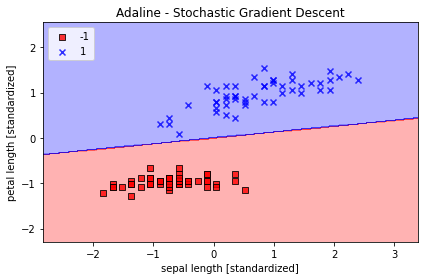

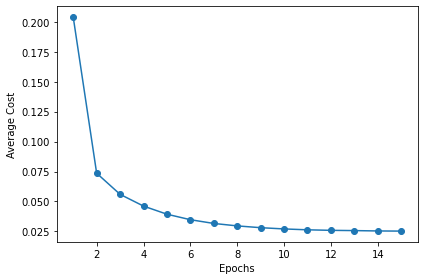

In [13]:
# fit메서드로 AdalineSGD 분류기를 훈련하고, plot_decision_regions로 훈련결과를 그래프
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) +1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()

* 평균 비용이 상당히 빠르게 감소.
* 15번째 Epoch 이후 최종 결정 경계는 배치 경사 하강법과 거의 유사.
* 스트리밍 데이터를 사용하는 온라인 학습 방식으로 모델을 훈련하려면 개개의 샘플마다 partial_fit 메서드를 호출

        ada.partial_fit(X_std[0, :], y[0])

In [14]:
ada_sgd.partial_fit(X_std[0, :], y[0])